# Assignment 1
### Kunal Naidu
### 30020999

## Introduction

In this report we will be analysizing the difference between list and tuples. Following we will be calculating the factorial of 52 and creating a function which simulates the Overhand shuffle.

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import time
import pandas as pd

When looking at a deck of cards; there are 52 different cards. To see how many different combinations we can have of the deck of cards we can take the factorial of 52. We can do this by:
\begin{equation}
n!=1*2*3*...*n
\end{equation}

Once calculated, we can compare the answer to assumed correct value from Wikipedia.

In [2]:
def factorial_52():
    """
    Calculates the factorial of 52.
    
    Parameters
    ----------
    
    None
    
    Returns
    -------
    
    factorial- the factorial of 52
    
    """
    factorial=1
    for values in range(1,53):
        factorial=factorial*values
    return factorial

print(np.format_float_scientific(factorial_52()))

8.065817517094388e+67


In [3]:
theoredical_factorial=80658175170943878571660636856403766975289505440883277824000000000000
print(np.format_float_scientific(theoredical_factorial))

8.065817517094388e+67


In [4]:
calculated_factorial=factorial_52()

In [5]:
percent_error_factorial=((calculated_factorial-theoredical_factorial)/theoredical_factorial)*100

print("percent error of factorial function",percent_error_factorial, "%")

percent error of factorial function 0.0 %


In [6]:
type(factorial_52())

int

In [7]:
int.bit_length(factorial_52())

226

We see that we were perfectly able to calculate the factorial of 52 when comparing the value to Wikipedia. Python's largest data type for an integer is int64. So the maximum value which can be calculated using that data type would be 9,223,372,036,854,775,807; which is signicantly smaller than the factorial of 52. The expected result when calculating the factorial using interger type would be an overflow error. But we can see that this did't happen. So we can assume that there has been an update in python which can handle a larger interger. Looking at the data type of our answer we can see that it has a int data type. Anayzing the int data type we can see the bit length for our answer which was 226. This could mean that python now has some variable int type which allocates memory when needed.

Now we will be looking at the overhand shuffle. The overhand shuffle is a shuffle where you take groups of cards from the top of the deck and move them to another hand to make another new deck. The following function will simulate the shuffle.

In [8]:
def overhand_shuffle(deck, blocksize):
    """
    Takes a deck and simulates an overhand shuffle.
    
    Parameters
    ----------
    
    deck: List of numbers. Also called the deck of cards
    
    blocksize: The number of items in the list which are moved. Also can be referenced to the amount
    cards which are moved in the overhand shuffle in each step.
    
    Returns
    -------
    
    deck_new: A shuffled deck. A list with the same length and attributes but with the overhand
    shuffle applied to them.
    
    
    """
    deck_new=[]
    while len(deck) >= blocksize:
        for values in deck[-blocksize:]:
            deck_new.append(deck[values])
        deck=deck[:-blocksize]
    if len(deck) != 0:
        for values in deck:
            deck_new.append(values)
    return deck_new

In [9]:
deck=list(range(52))
print(overhand_shuffle(deck,5))

[47, 48, 49, 50, 51, 42, 43, 44, 45, 46, 37, 38, 39, 40, 41, 32, 33, 34, 35, 36, 27, 28, 29, 30, 31, 22, 23, 24, 25, 26, 17, 18, 19, 20, 21, 12, 13, 14, 15, 16, 7, 8, 9, 10, 11, 2, 3, 4, 5, 6, 0, 1]


The riffle shuffle is a shuffle that cuts the deck in half and combined the cards interleaved. Shuffling the deck 7 times should completely randomize the deck. We will try to prove that statement.

In [10]:
def riffle_shuffle(deck):
    """ This function changes the order of a sequence 
    by dividing it into two sections and merging them
    like shuffling a deck of cards.
    """
       
    ncards = len(deck)
    assert( (ncards %2) == 0 )
    assert( ncards == 52 )
    
    nhalf = ncards//2
    half0 = deck[0:nhalf]
    half1 = deck[nhalf:]
   
    result = []
    for indx in range( nhalf ):
        result.append( half0[indx] )
        result.append( half1[indx] )
        

    return result
        
deck = range(52)[:]
for count in range(7):
    deck = riffle_shuffle(deck)
print(deck)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]


The riffle function does not randomize the cards after 7 shuffles. This isn't due to any error of the function. Theoredically simililar to the function, the riffle shuffle is very exact and reapeating it 7 times causes it to have a known layout of the cards. But in real life this is not the case. Using a riffle shuffle can completely randomize a deck of cards. This is due to the human error. When actually doing a riffle shuffle you aren't able to perfectly cut the deck in half all the time. Also when going to combine the cards interleaved; in actuality does not perfectly happen because instead of alternating, sometimes we can have multiple cards from one side being included.

Arnolds "catmap" applies a transformation to an image which is equilvant to sheering and folding. Two methods were used. The first method used loops to modify one pixel at a time. The second method was to array indexing. The two methods computation time will be compared to determine efficientcy.

In [11]:
def catmap1(square):
    """Apply Arnold's cat map to a square NxN numpy array
    using loops to modify pixels one at a time.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    result = square.copy()
    for x in range(nx):
        for y in range(ny):
            xx = x + y
            yy = x + 2*y
            result[x,y] = square[xx % nx, yy % ny]
            
    return result

def catmap2(square):
    """
    Apply Arnold's cat map to a square NxN numpy array 
    using array indexing.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]  


In [12]:

data={}

catmap_1_time=[]
catmap_2_time=[]

iterations=list(range(2,257))

for n in iterations:
    test = np.arange(n*n).reshape(n,n)
    test1 = test.copy()
    test2 = test.copy()

    time_i_1=time.clock()
    catmap1(test1)
    time_f_1=time.clock()
    time_delta_1=time_f_1-time_i_1


    time_i_2=time.clock()
    catmap2(test2)
    time_f_2=time.clock()
    time_delta_2=time_f_2-time_i_2
    
    catmap_1_time.append(time_delta_1)
    catmap_2_time.append(time_delta_2)

data[1]=catmap_1_time
data[2]=catmap_2_time


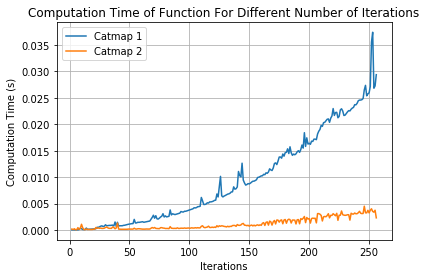

In [13]:
for n,l in zip(data.keys(),['Catmap 1','Catmap 2']):
    plt.plot(iterations, data[n],label=l)
    
plt.grid('on')
plt.title('Computation Time of Function For Different Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Computation Time (s)')
plt.legend(loc=0)

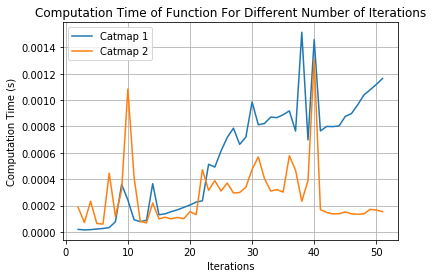

In [14]:
for n,l in zip(data.keys(),['Catmap 1','Catmap 2']):
    plt.plot(iterations[:50], data[n][:50],label=l)
    
plt.grid('on')
plt.title('Computation Time of Function For Different Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Computation Time (s)')
plt.legend(loc=0)

For several different iterations of both functions, we can see that as the iterations increase; Catmap1 starts to increase in computation time while Catmap2 someone has a constant computation time. This is expected because the computation of loops take much longer than array indexing. 

The small spikes throughout the curve arises from the variability in the compuation time. The curve could be smoothed out by averaging serval time measurements but due to lowering computation time, it was decided to take single time meaurements. But still we are able to see the trend of the graph. 

Looking at the data before 10 iterations we can see that Catmap1 actually takes less time to compute than Catmap 2. 
This is the case where having loops is faster than array indexing.

From this we can see that knowing our data and the opperations preformed can beneficial when choosing a method of calculation.

Now we will look at Catmap 1 in particular and how many iterations it takes for the different size images.

In [15]:
def iteration_cat(n):
    """
    Apply Arnold's cat map to a square NxN numpy array
    using loops to modify pixels one at a time.
    """
    count=0
    square = np.arange(n*n).reshape(n,n)
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    result_square = square.copy()
    for x in range(nx):
        for y in range(ny):
            result_square[x,y] = square[x,y]
            count=count+1
    return count

In [16]:
iteration_number=list(range(2,21))
iterations=[]
for values in iteration_number:
    iterations.append(iteration_cat(values))
    


In [17]:
pd.DataFrame({'Size of NxN Matrix':iteration_number,'Iterations':iterations})

,Size of NxN Matrix,Iterations
0,2,4
1,3,9
2,4,16
3,5,25
4,6,36
5,7,49
6,8,64
7,9,81
8,10,100
9,11,121


In [18]:
fig_iteration_number=list(range(2,257))
fig_iterations=[]
for values in fig_iteration_number:
    fig_iterations.append(iteration_cat(values))


Text(0,0.5,'Iterations')

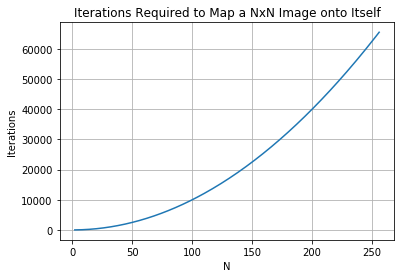

In [19]:
plt.plot(fig_iteration_number,fig_iterations)

plt.grid('on')
plt.title('Iterations Required to Map a NxN Image onto Itself')
plt.xlabel('N')
plt.ylabel('Iterations')


We can see that as image or matrix gets larger, the amount of iterations exponentially increase.

## Discussion

The differnece between tuples and lists is that you can't change the values or length in a tuple after it has been created. Lists have variable length and the items in the list can be added and removed. Tuples use parentheses as lists use brackets. The entries for tuples can be unrelated from one another while the entries in lists are all related. List's can't be used for dictionary keys while tuples can.

## Conclusion

In this report, we initially looked at the calculation of the factorial 52. We found something we didn't expect which resulted in us seeing a change in how python treats interger data types. 

Following that a function was made that simulated the overhand shuffle. 

The riffle shuffle was also simulated using a function but didn't follow the belief that shuffling 7 times will completely randomize a deck. But when taking into account human error we can see that it is possible. 

Catmap1 and Catmap 2 were both compared for computation time for the different number of iterations. Where Catmap1 was seen to be more efficient with very small iterations while Catmap 2 was more efficient with larger iterations. This let us come to the conclusion that knowing what operations we perform and the data we are using can help us use a efficient method of calculation. 

Finally we looked specifically at Catmap1 and found that as the matrix gets larger the iterations exponentially increase.